In [153]:
import pandas as pd
data = pd.read_csv("data_folder/tweet_dataset.csv")
tweet_list = []
label_list = []
for each in list(data.iloc[:,2]):
    tweet_list.append(each.split())
for each in list(data.iloc[:,1]):
    label_list.append(each.split())
dataset_len = len(tweet_list)
train_tweet_list = tweet_list[:dataset_len*6//10]
test_tweet_list = tweet_list[dataset_len*6//10:]
train_label_list = label_list[:dataset_len*6//10]
test_label_list = label_list[dataset_len*6//10:]
#print(tweet_list)
#print(set(data.iloc[:,1]))

In [154]:
from gensim.models import Word2Vec
model = Word2Vec(train_tweet_list,min_count = 1,sg=0)
print(model)
vocab = model.wv.vocab
#vocab = vocab.toarray()
#vocab = ['none','sexism','racism']
vocab_vector = model[vocab]
model.save('model')

Word2Vec(vocab=15377, size=100, alpha=0.025)


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


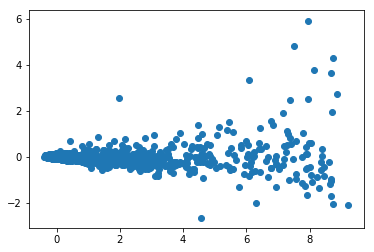

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


array([-0.01956367,  0.14374948, -0.27993253, -0.08090416, -0.05819423,
        0.03509879, -0.01942267, -0.15208739,  0.03102652, -0.3336365 ,
       -0.34257677,  0.22627914, -0.08023277, -0.24115896,  0.14834656,
        0.15137237,  0.21476421,  0.17233242, -0.38239807, -0.16653201,
        0.13238819,  0.36218473, -0.00964069,  0.20942046,  0.10009214,
        0.18748273, -0.02872231, -0.09400109, -0.20383282,  0.14342627,
       -0.15729356,  0.19261676, -0.00753925,  0.29474312,  0.05642352,
        0.12172358,  0.22389875,  0.29731613, -0.01187667, -0.05609652,
       -0.1693686 ,  0.15301149,  0.10824167, -0.11136031, -0.13636507,
        0.22944883, -0.27670085,  0.15138209,  0.08663043,  0.07028219,
        0.30322677,  0.01464205,  0.02072238,  0.22596012,  0.25158817,
       -0.0907148 ,  0.14942132,  0.16240974, -0.00170599,  0.4022652 ,
        0.19361246,  0.15601186,  0.10617246,  0.0214516 , -0.3670752 ,
       -0.04768132, -0.2086651 , -0.09896099, -0.22279426, -0.17

In [155]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
vector = pca.fit_transform(vocab_vector)
plt.scatter(vector[:,0],vector[:,1])
plt.show()
model['word']

In [156]:
model = Word2Vec.load("model")
print(test_tweet_list[160])
model.most_similar('did')[0][1]

['PAX', 'ugh', 'what', 'did', 'they', 'do', 'this', 'year']


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9998428225517273

# Classification using Neural network
## we are using MLPClassifier algorithm

By taking the word vector of sentences as the average of word vector of word present in sentence as well as Word2Vec vocablury

In [157]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
pca = PCA(n_components = 100)

X = []

for each in train_tweet_list:
    t = np.zeros(100)
    for i in each[1:]:
        t = t + model[i]
    t = t / len(each)
    X.append(t)
#X = np.asarray(X)
#print(len(train_label_list))
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(100,),warm_start=True, random_state=1)
clf.fit(X,train_label_list)
'''
converting test tweet dataset to word vectors
'''
test_vector = []
for each in test_tweet_list:
    t = np.zeros(100)
    for i in each[1:]:
        if i in vocab:
            t = t + model[i]          # after excluding below else statement accuracy in self word vector is 0.7217149048134963
        '''
        else: 
            t = t + np.zeros(100)     # after including this else statement our accuracy is 0.7209410308001857
        '''
        '''
            from gensim.models import FastText as ftext
            fast_text_wv = ftext(train_tweet_list)                  this code cand be used for words not in vocab
            word = (fast_text_wv.most_similar(i))[0][0]             some words are still giving some error
            t = t + model[word]
        '''
            
    t = t / len(each)
    test_vector.append(t)
pred = clf.predict(test_vector)
print(pred)
acc = accuracy_score(test_label_list,pred)
print(acc)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


['none' 'none' 'none' ... 'sexism' 'none' 'none']
0.7223340040241448


By taking the word vector of sentences as the average of weighted word vector of word present in sentence as well as Word2Vec vocablury. weighted word vector can be found by multiplying word vector to its Tf-idf score.


In [158]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# our corpus

cv = CountVectorizer()

# convert text data into term-frequency matrix
dat = cv.fit_transform(data.iloc[:,2])

tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(dat)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(cv.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)
'''from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=None)
vec = vectorizer.fit_transform(data.iloc[:,2])
v = dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))
vec[0, vectorizer.vocabulary_['word']] '''

00 9.591186871324563
000 7.4317026219711915
00001 9.996651979432729
01 9.080361247558573
02 9.303504798872783
05 9.591186871324563
0f 9.996651979432729
10 6.719507246440552
100 6.546664433601141
1000 8.204892510204672
10000teamsleft 9.996651979432729
10000x 9.996651979432729
1000s 9.996651979432729
1000x 9.996651979432729
100k 9.591186871324563
100lbs 9.996651979432729
100s 9.303504798872783
100th 9.591186871324563
100x 9.996651979432729
101 8.74388901093736
1018 9.996651979432729
102 9.996651979432729
103 9.996651979432729
1032 9.996651979432729
104 9.591186871324563
107 9.591186871324563
109 9.591186871324563
10am 9.996651979432729
10hr 9.996651979432729
10k 9.996651979432729
10s 9.591186871324563
10secondheadloss 9.996651979432729
10thousandstepsagain 9.996651979432729
10x 9.591186871324563
11 7.799427402096509
110 9.996651979432729
1100 8.89803969076462
12 7.13445109850326
120 8.610357618312838
1230 9.996651979432729
1233 9.996651979432729
12h 9.591186871324563
12k 9.99665197943272

alwa 9.996651979432729
always 5.919114535527009
aly 7.5543049440635235
am 5.309901806452214
ama 9.591186871324563
amag 9.996651979432729
amateur 9.996651979432729
amaze 9.303504798872783
amazeballs 9.996651979432729
amazed 9.591186871324563
amazes 9.996651979432729
amazing 6.861157763503578
amazingly 9.591186871324563
amazon 8.124849802531138
ambitious 9.996651979432729
ambulance 9.303504798872783
ambush 9.591186871324563
amd 9.591186871324563
amelia 9.996651979432729
amen 9.996651979432729
amendment 9.591186871324563
america 7.511745329644728
american 7.470923335124473
americanexceptionalism 9.996651979432729
americans 7.799427402096509
americansniper 9.996651979432729
amid 9.996651979432729
amidst 9.996651979432729
amin 9.996651979432729
amirite 8.74388901093736
amman 9.996651979432729
ammarrah 9.996651979432729
ammo 9.591186871324563
among 8.124849802531138
amount 7.745360180826233
amounts 9.591186871324563
amp 4.331956893484573
amping 9.996651979432729
ample 9.996651979432729
amput

baddie 9.591186871324563
badgers 9.996651979432729
badges 9.996651979432729
badidea 9.996651979432729
badly 9.080361247558573
badmouthing 9.591186871324563
badr 9.996651979432729
badsportmanship 9.591186871324563
badsports 9.996651979432729
bae 9.996651979432729
bag 7.645276722269251
bagavad 9.996651979432729
bagdad 9.996651979432729
bagel 9.996651979432729
baghdad 9.303504798872783
baghdadi 6.861157763503578
bags 9.591186871324563
bah 9.591186871324563
bahah 9.996651979432729
bahahaha 8.89803969076462
bahahahaha 9.591186871324563
bahahahahahaha 9.996651979432729
bahahahahahahaha 9.996651979432729
bahatti55 9.996651979432729
baiji 8.610357618312838
bail 9.996651979432729
bait 9.591186871324563
baiting 8.610357618312838
bajillion 9.996651979432729
bake 8.492574582656454
baked 8.74388901093736
baker 9.996651979432729
baking 9.080361247558573
bakr 9.080361247558573
balance 8.74388901093736
balanced 9.591186871324563
balancing 9.996651979432729
bald 9.996651979432729
baldwin 9.303504798872

boycott 9.303504798872783
boycotting 9.591186871324563
boyfriend 8.387214066998627
boys 7.193291598526193
boyyyyy 9.996651979432729
boyz 9.080361247558573
bozo 9.996651979432729
bozos 9.996651979432729
br 9.996651979432729
bra 9.591186871324563
braces 9.996651979432729
bracket 9.591186871324563
brad 9.996651979432729
bradley 9.996651979432729
brag 9.996651979432729
bragged 9.591186871324563
brain 7.255811955507527
brainpower 9.996651979432729
brains 8.204892510204672
brainwashed 8.74388901093736
branch 9.996651979432729
brand 9.303504798872783
brandis 9.996651979432729
brando 9.996651979432729
brands 9.996651979432729
bras 9.996651979432729
brat 9.591186871324563
bratty 9.996651979432729
bravely 9.996651979432729
brazenly 9.996651979432729
brazil 9.591186871324563
brb 9.996651979432729
bread 7.9817489588904635
breadwinners 9.996651979432729
break 7.5543049440635235
breakdown 9.996651979432729
breakfast 6.295350005320235
breakfasting 9.996651979432729
breakfasts 9.303504798872783
breaki

chrissakes 9.996651979432729
christ 8.387214066998627
christian 6.757973527268348
christiandom 9.591186871324563
christianity 7.4317026219711915
christians 6.016970325530767
christina 9.996651979432729
christine 9.996651979432729
christmas 8.050741830377415
christopher 9.996651979432729
chroma 9.303504798872783
chrome 9.591186871324563
chromosome 9.303504798872783
chs 9.303504798872783
chuck 9.080361247558573
chucked 9.303504798872783
chuckle 9.591186871324563
chums 9.591186871324563
church 7.9817489588904635
churches 8.74388901093736
churchhill 9.996651979432729
churchill 9.303504798872783
churn 8.89803969076462
churned 9.996651979432729
churner 8.387214066998627
churning 9.996651979432729
cia 9.080361247558573
cig 9.996651979432729
cigarette 9.303504798872783
cigarettes 9.996651979432729
cigarillo 9.996651979432729
cinvlou 9.996651979432729
circle 8.89803969076462
circlejerk 9.996651979432729
circlejerks 9.996651979432729
circles 9.303504798872783
circling 9.996651979432729
circuit 9

craziest 9.996651979432729
crazy 6.8185981490847825
crazybitch 9.591186871324563
crazydame 9.996651979432729
crazyeyes 9.996651979432729
crazytown 9.996651979432729
cream 7.745360180826233
creamy 9.996651979432729
crease 9.996651979432729
creasey86 9.996651979432729
create 7.288601778330518
created 7.511745329644728
creates 9.080361247558573
creating 8.050741830377415
creation 9.080361247558573
creations 9.996651979432729
creative 9.080361247558573
creatively 9.996651979432729
creator 8.74388901093736
creatures 9.591186871324563
credentials 9.996651979432729
credibility 8.291903887194302
credible 9.591186871324563
credit 7.856585815936457
creditors 9.996651979432729
credits 9.591186871324563
creds 9.996651979432729
creep 9.303504798872783
creeped 9.996651979432729
creeper 9.591186871324563
creeping 9.996651979432729
creeps 9.996651979432729
creepy 8.492574582656454
creosote 9.996651979432729
crepes 9.996651979432729
crescendo 9.996651979432729
cretin 9.591186871324563
cretins 8.8980396

destroys 8.89803969076462
destruction 8.124849802531138
destructive 9.080361247558573
detach 9.996651979432729
detail 9.591186871324563
detailed 9.591186871324563
details 8.387214066998627
determination 9.996651979432729
determine 9.591186871324563
determined 8.89803969076462
determines 9.591186871324563
deterrent 9.996651979432729
detestable 9.996651979432729
detractors 9.996651979432729
detracts 9.996651979432729
detroit 9.996651979432729
dev 7.4317026219711915
devastated 9.996651979432729
devastating 9.996651979432729
develop 8.74388901093736
developer 8.204892510204672
developers 9.591186871324563
developerweek 9.591186871324563
developing 9.996651979432729
development 9.996651979432729
device 9.591186871324563
devices 9.591186871324563
devil 8.387214066998627
devo 9.996651979432729
devoid 9.996651979432729
devolve 9.996651979432729
devops 8.291903887194302
devopsing 9.591186871324563
devout 9.996651979432729
devpolicy 9.303504798872783
devs 8.291903887194302
devweek15 9.9966519794

ele 9.591186871324563
elect 9.303504798872783
elected 9.591186871324563
election 9.591186871324563
elections 8.492574582656454
electricity 9.996651979432729
elegance 9.996651979432729
elegant 9.303504798872783
element 8.74388901093736
elementary 9.996651979432729
elements 9.996651979432729
eleonore 9.996651979432729
elephant 8.492574582656454
elephants 8.89803969076462
elevated 9.996651979432729
elevator 9.996651979432729
eleventy 9.996651979432729
elieeliaworld 9.996651979432729
eliminate 9.591186871324563
eliminated 7.000919705878737
eliminatethem 9.996651979432729
eliminating 9.996651979432729
elimination 7.078881247348449
eliot 9.996651979432729
elis 9.996651979432729
elite 9.303504798872783
elizabeth 9.996651979432729
elliot 9.996651979432729
elms 9.996651979432729
elreda 9.591186871324563
els 9.996651979432729
elsa 9.996651979432729
else 6.247147903502357
elsewhere 8.89803969076462
em 7.5543049440635235
email 7.000919705878737
emailed 9.303504798872783
emailing 9.591186871324563


ff 9.591186871324563
ffrnn 9.996651979432729
ffs 7.9172104377528925
fianc 9.080361247558573
fiction 9.080361247558573
fictional 9.591186871324563
fiddle 9.996651979432729
fiddling 9.996651979432729
fiel 9.996651979432729
field 8.204892510204672
fields 9.303504798872783
fierce 9.996651979432729
fifa 9.996651979432729
fife 9.996651979432729
fifty 9.591186871324563
fiftyshades 9.591186871324563
fight 6.34599373813899
fighter 9.591186871324563
fighters 7.598756706634357
fighting 6.777776154564528
fightng 9.996651979432729
fights 8.492574582656454
figurative 9.996651979432729
figuratively 9.996651979432729
figure 7.35759464981747
figured 8.74388901093736
figures 9.591186871324563
figuring 8.89803969076462
file 8.74388901093736
filed 9.996651979432729
filehandle 9.996651979432729
files 8.89803969076462
filesystem 9.996651979432729
filing 9.591186871324563
filippelli 9.303504798872783
fill 8.74388901093736
filled 8.610357618312838
filling 9.591186871324563
film 7.799427402096509
filmed 9.9966

gloating 9.591186871324563
gloats 9.996651979432729
global 8.74388901093736
globally 9.303504798872783
globe 9.996651979432729
glorified 9.996651979432729
glorify 9.996651979432729
glorious 9.591186871324563
glory 9.080361247558573
gloves 9.080361247558573
glows 9.996651979432729
gluttonous 9.996651979432729
gm 9.996651979432729
gmail 9.996651979432729
gnaa 9.996651979432729
gnocchi 9.303504798872783
go 4.723652420868982
goa2mad 9.996651979432729
goal 8.387214066998627
goalready 9.996651979432729
goals 9.303504798872783
goat 8.387214066998627
goaters 9.996651979432729
goaway 9.996651979432729
gob 9.591186871324563
goblin 9.996651979432729
gobs 9.996651979432729
god 5.837768896073056
godawful 9.996651979432729
goddamn 8.89803969076462
goddamned 9.996651979432729
goddamnit 9.996651979432729
goddess 9.996651979432729
gods 9.303504798872783
godsend 9.996651979432729
goebbels 9.996651979432729
goes 6.8831366702223535
goggleboxau 8.89803969076462
gohbel 9.996651979432729
gohome 9.08036124755

heeeeeyyyyy 9.996651979432729
heels 9.080361247558573
heelsdontbelongonthefield 9.996651979432729
heforshe 9.303504798872783
heh 9.303504798872783
hehe 9.080361247558573
hehehe 9.303504798872783
heheheh 9.996651979432729
hehehehehee 9.591186871324563
heifer 9.996651979432729
heights 9.996651979432729
heinous 9.996651979432729
heinz 9.996651979432729
heirloom 9.996651979432729
held 9.080361247558573
helen 9.591186871324563
helena 9.080361247558573
helenaandvikki 9.996651979432729
helicopters 9.996651979432729
hell 6.485106540601707
hellno 9.996651979432729
hello 8.291903887194302
helloooh 9.996651979432729
helloooo 9.996651979432729
helm 9.996651979432729
helmer 9.996651979432729
help 6.212462345514467
helped 8.492574582656454
helpful 9.080361247558573
helpi 9.996651979432729
helping 7.745360180826233
helpless 9.303504798872783
helps 8.74388901093736
helvetica 9.996651979432729
hen 9.996651979432729
hence 9.591186871324563
henchmen 9.996651979432729
hennessy 9.996651979432729
her 4.8579

innate 9.303504798872783
inner 9.996651979432729
innnnteresting 9.996651979432729
innocence 9.591186871324563
innocent 7.694066886438683
innocents 9.996651979432729
innovating 9.996651979432729
innovation 9.996651979432729
inopportune 9.996651979432729
inordinate 9.591186871324563
inpatient 9.996651979432729
input 9.303504798872783
inputting 9.996651979432729
inquiries 9.996651979432729
ins 9.996651979432729
insane 7.694066886438683
insanely 9.996651979432729
insanity 9.591186871324563
inscribes 9.996651979432729
insecure 9.996651979432729
insert 8.89803969076462
inserting 9.591186871324563
inside 8.291903887194302
insider 9.996651979432729
insidious 9.996651979432729
insight 9.080361247558573
insightful 9.996651979432729
insights 9.996651979432729
insinuated 9.996651979432729
insist 8.74388901093736
insisting 9.996651979432729
insists 9.591186871324563
inspiration 9.996651979432729
inspire 9.996651979432729
inspired 8.610357618312838
inspiring 9.996651979432729
inst 9.996651979432729


karbala 9.996651979432729
karbalah 9.996651979432729
kardashian 9.080361247558573
kardashians 9.996651979432729
karen 9.303504798872783
karlie 9.591186871324563
karma 6.928599044299111
karmaisabitch 8.89803969076462
kasasbeh 9.303504798872783
kashmir 9.996651979432729
kat 3.8396729938471728
katandandre 6.485106540601707
katandandrearejustmeanespeciallykat 9.996651979432729
katandandresuck 9.996651979432729
katandre 9.996651979432729
katdogg 9.996651979432729
kate 8.291903887194302
kath 9.996651979432729
katherine 9.996651979432729
kathir 9.996651979432729
kathleen 9.996651979432729
kathy 8.89803969076462
katie 5.902307417210627
katieandnikki 8.492574582656454
katieorsini 9.996651979432729
katisadog 9.996651979432729
katisawanker 9.996651979432729
katisdirt 9.996651979432729
katjia 9.303504798872783
katmkr 9.996651979432729
katruinsmkr 9.996651979432729
kats 7.5543049440635235
katt 9.996651979432729
katthebitch 9.996651979432729
kattherat 9.996651979432729
katz 9.591186871324563
kay 9.5

lsl 9.996651979432729
lt 6.247147903502357
ltfu 9.996651979432729
luachra 9.591186871324563
lube 9.996651979432729
luck 7.255811955507527
luckily 9.303504798872783
lucky 8.291903887194302
ludacris 9.996651979432729
lug 9.996651979432729
luggage 9.591186871324563
lumberjacks 9.996651979432729
lummox 9.591186871324563
lumping 9.996651979432729
luna 9.996651979432729
lunatic 8.74388901093736
lunatics 8.610357618312838
lunch 8.204892510204672
lung 9.996651979432729
lupindo 9.591186871324563
lure 9.996651979432729
luring 9.996651979432729
lurve 9.996651979432729
lust 9.996651979432729
luther 9.996651979432729
luv 9.996651979432729
lux 9.996651979432729
luxurious 9.996651979432729
lviv 9.996651979432729
lvl 9.591186871324563
lw 8.89803969076462
lws 9.996651979432729
lychees 9.996651979432729
lye 9.996651979432729
lying 6.385734066788504
lyked 9.996651979432729
lyn 9.080361247558573
lynch 9.996651979432729
lyndsey 9.591186871324563
lyndzy 9.996651979432729
lynn 7.288601778330518
lynne 8.89803

misandry 9.080361247558573
misbehavior 9.996651979432729
misc 9.996651979432729
misconceptions 9.996651979432729
misconfigured 9.591186871324563
miserably 9.591186871324563
misery 9.591186871324563
misfortune 9.303504798872783
misgendered 9.996651979432729
misguided 9.996651979432729
misinformed 9.591186871324563
misinterpret 9.996651979432729
mislabeled 9.996651979432729
mislead 9.591186871324563
misogynist 7.694066886438683
misogynistic 9.996651979432729
misogynists 8.74388901093736
misogyny 8.291903887194302
misplaced 9.996651979432729
miss 7.163438635376512
missed 7.3225033300061995
misses 9.996651979432729
missiles 9.996651979432729
missing 7.9817489588904635
missles 9.996651979432729
missouri 9.591186871324563
missus 9.591186871324563
mistake 8.050741830377415
mistakenly 9.996651979432729
mistakes 8.492574582656454
mistrust 9.996651979432729
misty 9.996651979432729
misunderstanding 9.996651979432729
misuse 9.996651979432729
misusing 9.996651979432729
mit 9.996651979432729
mitch 9

nothin 9.591186871324563
nothing 5.52501318606916
nothings 9.996651979432729
notice 7.35759464981747
noticeable 9.996651979432729
noticed 8.124849802531138
notification 9.591186871324563
notifications 8.291903887194302
noting 9.996651979432729
notions 9.996651979432729
notlearningmuch 9.996651979432729
notmeatballs 9.996651979432729
notnicepeople 9.996651979432729
notorious 9.996651979432729
notracist 9.303504798872783
nots 9.996651979432729
notsassy 9.996651979432729
notse 9.996651979432729
notsex 9.591186871324563
notsexis 9.996651979432729
notsexist 5.296171613640312
notsmart 9.996651979432729
nottheendoftheworld 9.996651979432729
notthesame 9.996651979432729
notyourmascot 9.591186871324563
notyourscapegoat 9.996651979432729
notyourshield 9.303504798872783
nourished 9.996651979432729
novels 9.591186871324563
november 7.9817489588904635
now 4.598489277914975
nowadays 9.996651979432729
nowhere 8.89803969076462
nowomenexis 9.996651979432729
nows 9.591186871324563
noyce 9.59118687132456

penetrate 9.996651979432729
penguinman1337 9.996651979432729
peninsula 7.9172104377528925
penis 9.303504798872783
pennies 9.996651979432729
penninsula 8.492574582656454
pennisula 9.996651979432729
penny 9.996651979432729
pens 9.591186871324563
pension 9.303504798872783
people 4.199075625490166
peoples 9.303504798872783
peopleschoice 9.303504798872783
pepperidge 9.996651979432729
peppers 9.996651979432729
pepto 9.996651979432729
per 8.050741830377415
percei 9.996651979432729
percentage 8.74388901093736
perceptions 9.996651979432729
percieved 9.996651979432729
percy 9.996651979432729
perdis 9.591186871324563
perf 9.591186871324563
perfect 7.13445109850326
perfecting 9.996651979432729
perfection 9.080361247558573
perfectly 8.204892510204672
perform 9.591186871324563
performance 9.303504798872783
performing 9.996651979432729
perfume 9.996651979432729
perhaps 7.645276722269251
period 8.050741830377415
periodically 9.591186871324563
periods 9.591186871324563
perish 9.996651979432729
perished

pretends 9.591186871324563
pretensions 9.996651979432729
pretentious 9.996651979432729
prettier 9.591186871324563
pretty 5.437525731946043
pretzel 9.996651979432729
prevent 8.387214066998627
preventative 9.303504798872783
preventatives 9.996651979432729
preventing 9.591186871324563
prevention 9.080361247558573
prevents 9.303504798872783
preview 9.591186871324563
previous 9.303504798872783
previously 9.591186871324563
prey 9.996651979432729
price 7.9817489588904635
price72 9.591186871324563
priceless 9.080361247558573
prices 9.303504798872783
prick 9.996651979432729
pricks 9.996651979432729
pride 9.080361247558573
prides 9.591186871324563
priest 9.303504798872783
priests 9.996651979432729
primary 9.080361247558573
prime 9.080361247558573
primitive 9.303504798872783
princess 9.996651979432729
princesses 9.996651979432729
principle 9.591186871324563
principles 9.996651979432729
print 8.74388901093736
printers 9.996651979432729
printing 9.996651979432729
prints 9.591186871324563
prior 9.59

regain 9.996651979432729
regains 9.996651979432729
regard 9.303504798872783
regarding 8.492574582656454
regardless 7.745360180826233
regards 8.89803969076462
regime 8.89803969076462
regimes 9.996651979432729
region 9.303504798872783
regions 9.996651979432729
register 9.996651979432729
registering 9.996651979432729
regress 9.996651979432729
regret 9.996651979432729
regrets 9.996651979432729
regrouped 9.996651979432729
regrouping 9.996651979432729
regu 9.996651979432729
regular 8.74388901093736
regularly 8.74388901093736
regulation 9.996651979432729
regulations 9.996651979432729
regulatory 9.996651979432729
regurgitating 9.996651979432729
rehabilitation 9.996651979432729
reid 9.996651979432729
reilly 9.996651979432729
reimer 9.996651979432729
reinforce 9.303504798872783
reinforcement 9.591186871324563
reinforcements 9.996651979432729
reinforces 9.591186871324563
reinstate 9.996651979432729
reinstating 9.996651979432729
reinvent 9.996651979432729
reisig 9.996651979432729
reiterate 9.59118

rumaisa 9.996651979432729
rumble 9.591186871324563
rumblings 9.996651979432729
rumor 9.996651979432729
rumored 9.996651979432729
rumors 9.080361247558573
rumour 9.996651979432729
run 6.646747892158123
runes 9.996651979432729
runni 9.996651979432729
running 7.288601778330518
runny 9.996651979432729
runs 8.89803969076462
runway 8.74388901093736
runways 9.996651979432729
ruptured 9.996651979432729
rural 9.996651979432729
rush 8.89803969076462
rushes 9.996651979432729
rushing 9.591186871324563
russ 9.591186871324563
russia 7.470923335124473
russian 7.163438635376512
russians 8.610357618312838
russias 9.996651979432729
rustic 9.996651979432729
rustled 9.996651979432729
rusty 9.303504798872783
rutherford 9.996651979432729
ruthless 9.591186871324563
rutledge 9.996651979432729
rx 9.591186871324563
ryan 9.591186871324563
rye 9.996651979432729
ryy 9.996651979432729
s19 9.591186871324563
sa 8.387214066998627
saa 9.996651979432729
sabc 9.996651979432729
sabotage 9.996651979432729
sabotaging 9.9966

sink 8.610357618312838
sioa 9.996651979432729
sip 9.996651979432729
sipping 9.996651979432729
sir 9.303504798872783
siri 9.591186871324563
sirivan 9.996651979432729
sisi 9.996651979432729
sister 7.9817489588904635
sisters 9.996651979432729
sistine 9.996651979432729
sit 7.645276722269251
site 7.598756706634357
sites 8.492574582656454
sits 9.080361247558573
sitting 7.9817489588904635
situ 9.996651979432729
situation 8.124849802531138
situations 9.996651979432729
sivz 9.996651979432729
six 7.9817489588904635
size 7.694066886438683
sized 9.080361247558573
sizeism 9.996651979432729
sizes 9.591186871324563
sizzle 9.996651979432729
sj 9.996651979432729
sj2neo 9.996651979432729
sjw 7.9817489588904635
sjwlogic 9.996651979432729
sjws 8.492574582656454
skalski 9.591186871324563
skank 9.080361247558573
skankkat 9.996651979432729
skanks 9.996651979432729
skanky 9.591186871324563
skase 9.996651979432729
skateboarding 9.996651979432729
skater 9.996651979432729
skaters 9.996651979432729
skeletons 9.99

stopwadh 9.996651979432729
stopwadhw 9.996651979432729
stopwadhwa2015 6.8185981490847825
storage 9.996651979432729
store 8.492574582656454
stored 9.303504798872783
stores 9.996651979432729
stories 7.9172104377528925
storify 9.996651979432729
storing 9.591186871324563
storm 8.291903887194302
story 6.700815113428399
storylines 9.996651979432729
storytelling 9.996651979432729
stra 9.996651979432729
straddle 9.591186871324563
straight 7.745360180826233
straining 9.996651979432729
stranded 9.303504798872783
strands 9.996651979432729
strange 8.74388901093736
stranger 9.591186871324563
strangers 8.74388901093736
strap 9.591186871324563
strapped 9.591186871324563
strat 9.996651979432729
strategic 6.515411890097036
strategically 6.952129541709305
strategicbullshit 9.996651979432729
strategicscoring 9.591186871324563
strategies 9.996651979432729
strategy 7.9817489588904635
straw 9.303504798872783
strawberries 9.996651979432729
strawman 9.591186871324563
stray 9.996651979432729
strayan 9.59118687

tentacles 9.996651979432729
tenth 9.996651979432729
tenths 9.996651979432729
tents 9.591186871324563
tenure 9.996651979432729
tenured 9.996651979432729
tequila 9.303504798872783
term 7.9817489588904635
terminate 9.996651979432729
terminology 9.591186871324563
termites 9.996651979432729
terms 8.204892510204672
terrible 7.288601778330518
terribly 9.996651979432729
terrified 9.303504798872783
terrifying 9.591186871324563
terror 7.645276722269251
terroris 9.996651979432729
terrorises 9.996651979432729
terrorism 7.255811955507527
terrorisme 9.996651979432729
terrorist 6.295350005320235
terrorists 6.399339718844282
terrorize 9.996651979432729
terrorizing 9.996651979432729
terry 9.996651979432729
test 8.124849802531138
testament 8.89803969076462
tested 9.996651979432729
testerosterone 9.996651979432729
testicle 9.996651979432729
testicles 9.996651979432729
testimony 9.303504798872783
testing 9.591186871324563
tests 9.996651979432729
tetris 9.080361247558573
tex 9.996651979432729
texa 9.996651

unborn 9.996651979432729
unbreakable 9.996651979432729
unbridled 9.996651979432729
uncalled 9.591186871324563
uncertain 9.996651979432729
unchallenged 9.996651979432729
unchanged 9.996651979432729
uncivilized 9.591186871324563
uncle 9.080361247558573
unclear 9.996651979432729
uncomfortable 8.610357618312838
uncommitted 9.996651979432729
unconfirmed 9.996651979432729
unconscionable 9.996651979432729
unconscious 8.89803969076462
unconventional 9.996651979432729
uncooked 9.996651979432729
uncovered 9.303504798872783
uncured 9.996651979432729
unde 9.996651979432729
undead 9.591186871324563
undeniable 9.996651979432729
under 6.212462345514467
undercooked 9.080361247558573
underestimate 9.591186871324563
underestimated 9.591186871324563
underestimating 9.996651979432729
undermanned 9.996651979432729
undermine 9.591186871324563
undermined 9.996651979432729
undermines 9.996651979432729
underneath 9.996651979432729
underpaid 9.996651979432729
underrepresented 9.591186871324563
underscores 9.996

wheresmytea 9.996651979432729
whether 8.610357618312838
whew 9.591186871324563
which 5.814601836791522
whichever 9.996651979432729
while 6.045408260851301
whilst 9.080361247558573
whim 9.303504798872783
whine 9.303504798872783
whined 9.303504798872783
whinge 9.996651979432729
whingers 9.996651979432729
whinging 9.996651979432729
whining 8.204892510204672
whiny 9.080361247558573
whip 9.591186871324563
whipped 9.996651979432729
whisk 9.996651979432729
whispers 9.591186871324563
whistle 9.996651979432729
whistleblower 9.591186871324563
whit 9.996651979432729
whitaker 9.996651979432729
white 6.3330903333030815
whiteandgold 9.996651979432729
whiteboard 9.591186871324563
whitefeminists 9.996651979432729
whitehouse 9.591186871324563
whiteness 9.996651979432729
whitening 9.996651979432729
whiteproverbs 9.996651979432729
whites 8.74388901093736
whitest 9.996651979432729
whitewash 9.996651979432729
whittled 9.080361247558573
whiz 9.996651979432729
who 4.403801065483808
whoa 8.74388901093736
whoa

"from sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer(stop_words=None)\nvec = vectorizer.fit_transform(data.iloc[:,2])\nv = dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))\nvec[0, vectorizer.vocabulary_['word']] "

In [159]:
for each in train_tweet_list:
    t = np.zeros(100)
    for i in each[1:]:
        t = t + model[i] * v[i]
    t = t / len(each)
    X.append(t)
#X = np.asarray(X)
#print(len(train_label_list))
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(100,),warm_start=True, random_state=1)
clf.fit(X,train_label_list)
'''
converting test tweet dataset to word vectors
'''
test_vector = []
for each in test_tweet_list:
    t = np.zeros(100)
    for i in each[1:]:
        if i in vocab:
            t = t + model[i]          # after excluding below else statement accuracy in self word vector is 0.7217149048134963
        '''
        else: 
            t = t + np.zeros(100)     # after including this else statement our accuracy is 0.7209410308001857
        '''
        '''
            from gensim.models import FastText as ftext
            fast_text_wv = ftext(train_tweet_list)                  this code cand be used for words not in vocab
            word = (fast_text_wv.most_similar(i))[0][0]             some words are still giving some error
            t = t + model[word]
        '''
            
    t = t / len(each)
    test_vector.append(t)
pred = clf.predict(test_vector)
print(pred)
acc = accuracy_score(test_label_list,pred)
print(acc)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


KeyError: 'I'